In [1]:
!pip install pmdarima -qq

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 54.6 MB/s 


In [2]:
import datetime
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import product
from tqdm import tqdm_notebook
from tqdm import tqdm
import glob

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccf
import pmdarima as pm

from pylab import rcParams

from sklearn.metrics import mean_squared_error
import seaborn as sns

%matplotlib inline

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Apresentação dos dados

In [4]:
recifemensal = pd.read_excel("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/BASERECIFEhorario.xlsx", index_col=0, parse_dates=[["Data", "HORA (UTC)"]])#.drop(columns=["Unnamed: 0"])

In [5]:
recifemensal

,Precipitacao,Temperatura,Velocidade,Pressao
Data_HORA (UTC),,,,
2007-10-01 00:00:00,0.0,23.7,2.0,1017.8
2007-10-01 01:00:00,0.0,23.3,1.7,1018.0
2007-10-01 02:00:00,0.0,23.8,2.4,1017.5
2007-10-01 03:00:00,0.0,23.4,1.9,1017.1
2007-10-01 04:00:00,0.0,23.2,2.0,1016.5
...,...,...,...,...
2007-10-31 19:00:00,0.0,27.1,3.2,1009.4
2007-10-31 20:00:00,0.0,26.2,3.0,1009.7
2007-10-31 21:00:00,0.0,25.8,3.8,1009.9


In [6]:
rcParams['figure.figsize'] = 30, 7

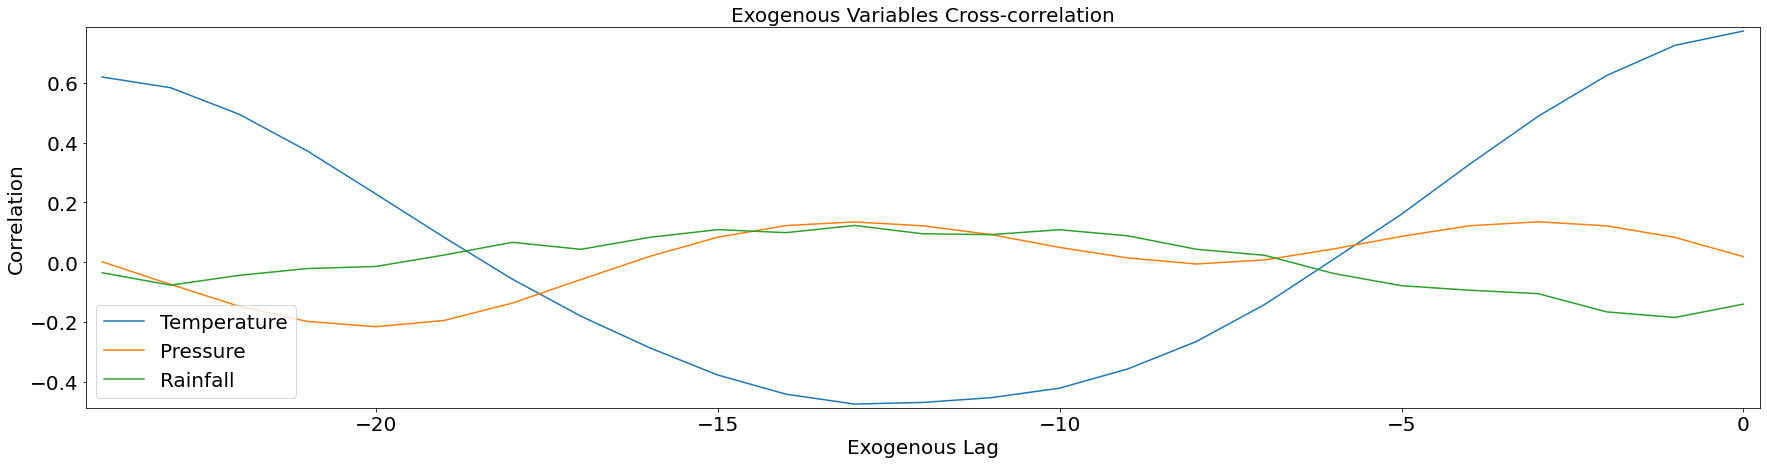

In [8]:
rcParams['figure.figsize'] = 30, 7
a = recifemensal['Velocidade'].values
b = recifemensal['Temperatura'].values
c = recifemensal['Pressao'].values
d = recifemensal['Precipitacao'].values

size=25
plt.plot(list(range(-size+1, 1)),ccf(a, b, adjusted=False)[:size][::-1], label='Temperature')
plt.plot(list(range(-size+1, 1)),ccf(a, c, adjusted=False)[:size][::-1], label='Pressure')
plt.plot(list(range(-size+1, 1)),ccf(a, d, adjusted=False)[:size][::-1], label='Rainfall')

plt.title("Exogenous Variables Cross-correlation", fontdict = {'fontsize' : 20})
plt.legend(fontsize=20, loc='lower left')
plt.ylabel('Correlation', fontdict = {'fontsize' : 20})
plt.xlabel('Exogenous Lag', fontdict = {'fontsize' : 20})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.margins(x=0.01, y=0.01)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


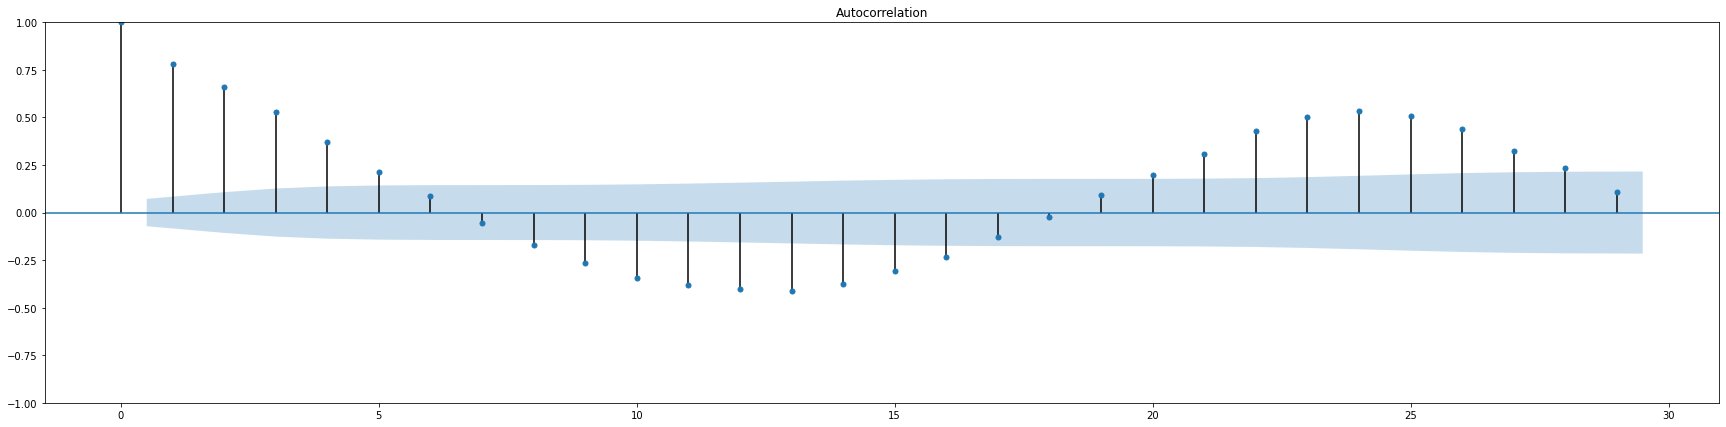

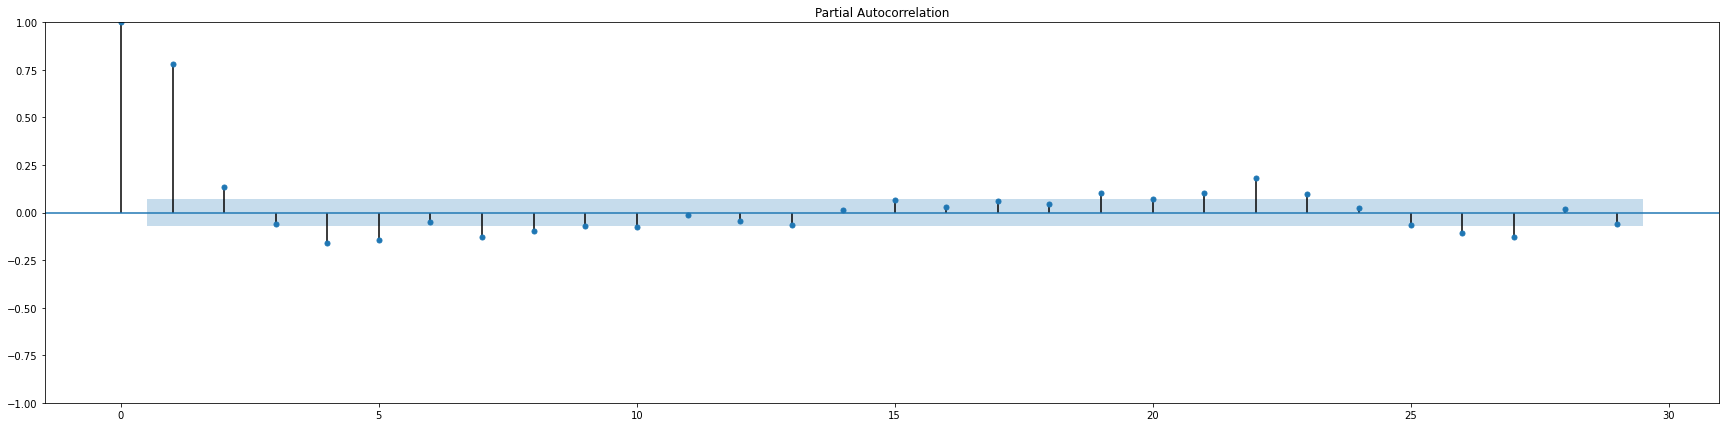

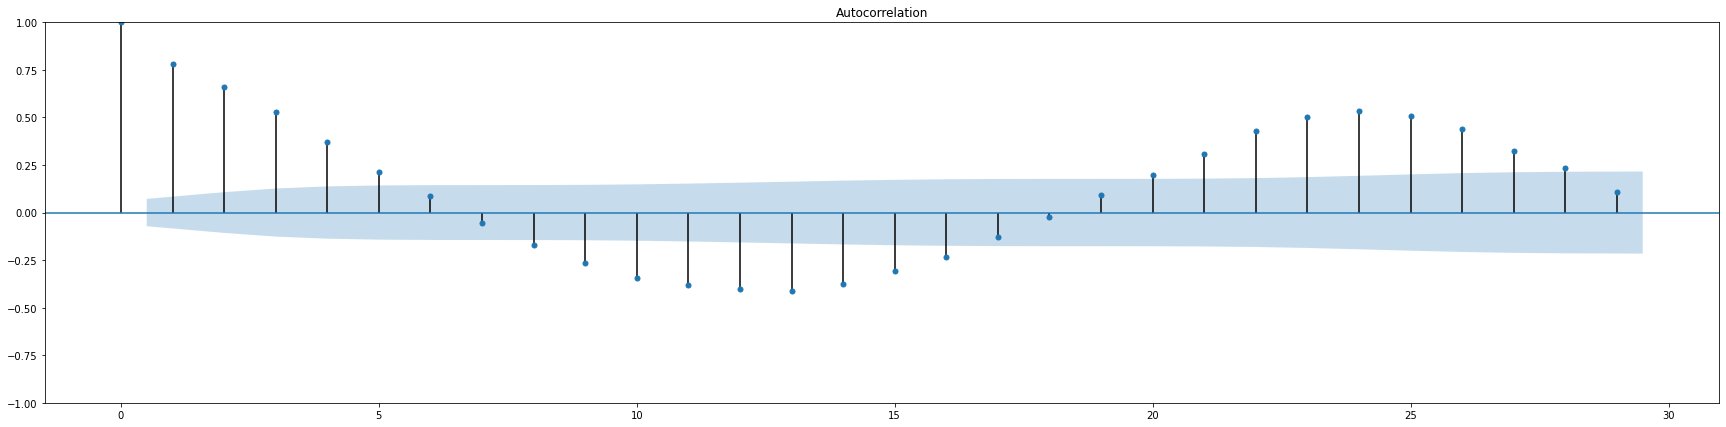

In [ ]:
plot_pacf(recifemensal["Velocidade"])
plot_acf(recifemensal["Velocidade"])

In [ ]:
quarto = int(recifemensal["Velocidade"].shape[0]/4)

In [ ]:
train = recifemensal["Velocidade"].iloc[:quarto*3].values.tolist()
test = recifemensal["Velocidade"].iloc[quarto*3:].values.tolist()

In [ ]:
model = pm.auto_arima(recifemensal["Velocidade"],m=24,d=1, trace=True,
                       error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=9.45 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=1590.703, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=1525.073, Time=0.82 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=1531.691, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=1588.703, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=1552.986, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=1497.727, Time=4.04 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=16.70 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=4.44 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=1566.271, Time=2.50 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=1482.736, Time=5.06 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=1518.718, Time=1.15 sec
 ARIMA(2,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=25.30 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=6.41 sec
 ARIMA(3,1,0)(2,0,0)[24] intercept   : AIC

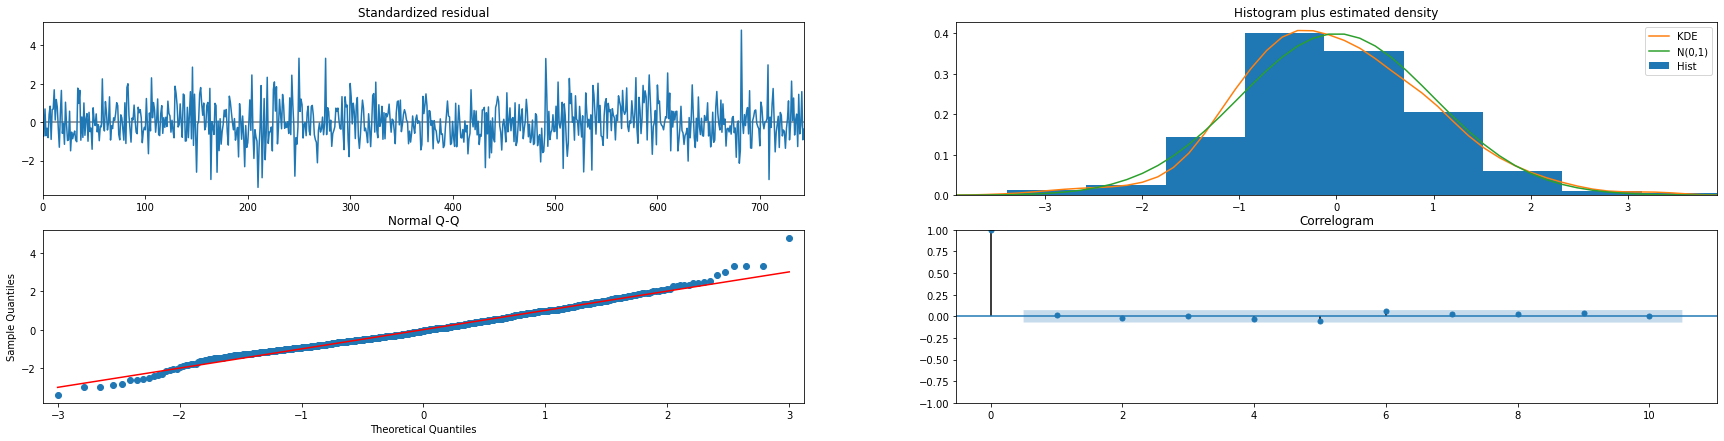

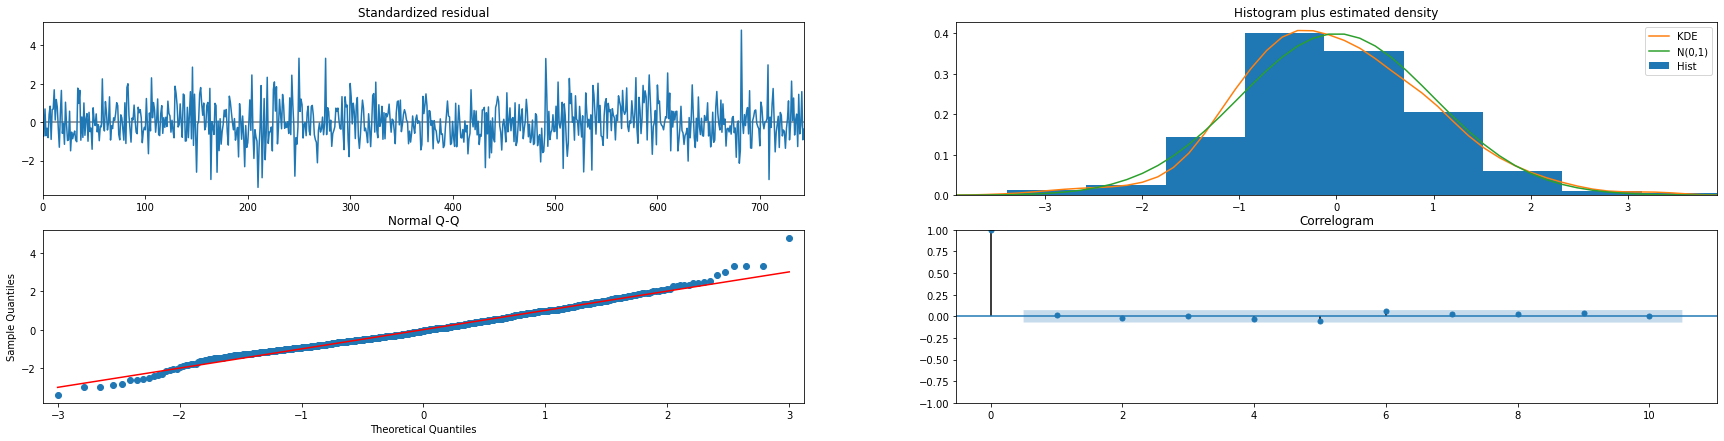

In [ ]:
model.plot_diagnostics()
#ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1443.710, Time=1.61 sec
#ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=17.971, Time=1.31 sec
#ARIMA(2,1,1)(2,0,1)[6] intercept   : AIC=10.494, Time=2.23 sec

#  ARIMA(4,0,0)(2,0,0)[24] intercept   : AIC=1424.312, Time=23.71 sec
#  ARIMA(4,0,0)(1,0,0)[24] intercept   : AIC=1452.495, Time=4.29 sec
#  ARIMA(4,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=30.08 sec
#  ARIMA(4,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=7.68 sec
#  ARIMA(5,0,0)(2,0,0)[24] intercept   : AIC=1419.610, Time=28.06 sec
#  ARIMA(5,0,0)(1,0,0)[24] intercept   : AIC=1443.054, Time=6.14 sec
#  ARIMA(5,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=34.38 sec
#  ARIMA(5,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=10.62 sec
#  ARIMA(5,0,1)(2,0,0)[24] intercept   : AIC=1411.553, Time=38.94 sec
#  ARIMA(5,0,1)(1,0,0)[24] intercept   : AIC=1429.309, Time=9.92 sec
#  ARIMA(5,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=41.85 sec
#  ARIMA(5,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=11.53 sec
#  ARIMA(4,0,1)(2,0,0)[24] intercept   : AIC=1410.056, Time=48.56 sec
#  ARIMA(4,0,1)(1,0,0)[24] intercept   : AIC=1427.584, Time=20.40 sec
#  ARIMA(4,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=85.05 sec
#  ARIMA(4,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=12.58 sec
#  ARIMA(3,0,1)(2,0,0)[24] intercept   : AIC=1428.169, Time=29.10 sec
#  ARIMA(4,0,2)(2,0,0)[24] intercept   : AIC=1426.707, Time=36.98 sec
#  ARIMA(3,0,2)(2,0,0)[24] intercept   : AIC=1456.203, Time=37.74 sec

In [ ]:
model.summary()
#(5, 1, 3)x(2, 0, 0, 12)
#61851.170

#SARIMAX(5, 1, 1)x(1, 0, [], 12) 	
#62170.854

#SARIMAX(5, 0, 0)x(2, 1, [1], 12)
#62373.948

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  744
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 24)   Log Likelihood                -710.074
Date:                            Tue, 26 Apr 2022   AIC                           1432.148
Time:                                    07:54:17   BIC                           1459.623
Sample:                                         0   HQIC                          1442.755
                                            - 744                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4451      0.034     12.920      0.000       0.378       0.513
ar.L2          0.1590      0.040      4.019      0.000       0.081       0.236
ar.L3          0.1385      0.036      3.894      0.000       0.069       0.208
ar.S.L24      -0.6827      0.032    -21.553      0.000      -0.745      -0.621
ar.S.L48      -0.3486      0.037     -9.411      0.000      -0.421      -0.276
sigma2         0.4128      0.021     20.003      0.000       0.372       0.453
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.73
Prob(Q):                              0.97   Prob(JB):                         0.25
Heteroskedasticity (H):               0.89   Skew:                            -0.00
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = pm.arima.ARIMA((5,0,1),(1,0,0,24),
                       error_action='ignore', suppress_warnings=True)
model.fit(recifemensal["Velocidade"])

ARIMA(order=(5, 0, 1), seasonal_order=(1, 0, 0, 24), suppress_warnings=True)

In [ ]:
pd.Series(model.resid()).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_resid_series.csv")

In [ ]:
model = pm.arima.ARIMA(model.get_params()['order'], model.get_params()['seasonal_order'],
                       error_action='ignore', suppress_warnings=True)
model.fit(train)

prediction = model.predict(len(test))

pd.Series(prediction).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_prediction_bad.csv")
test_resid = [a_i - b_i for a_i, b_i in zip(test, prediction)]
pd.Series(test_resid).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_resid_test_bad.csv")

In [ ]:
from tqdm import tqdm

prediction = []
history = train.copy()
for i in tqdm(range(len(test))):
    model = pm.arima.ARIMA(model.get_params()['order'], model.get_params()['seasonal_order'],
                       error_action='ignore', suppress_warnings=True)
    model.fit(history)
    #print(f'working on {i+1}')
    prediction.append(model.predict()[0])
    history.append(test[i])

test_resid = [a_i - b_i for a_i, b_i in zip(test, prediction)]
pd.Series(test_resid).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_resid_test_good.csv")
pd.Series(prediction).to_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_prediction_good.csv")

100%|██████████| 186/186 [29:20<00:00,  9.46s/it]


In [ ]:
prediction = pd.read_csv("/content/drive/MyDrive/Hybrid Transformer/Datasets/Vento/recifehora_prediction_good.csv")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [ ]:
prediction = prediction["0"].values

In [ ]:
print(mean_squared_error(prediction, test))
print(sqrt(mean_squared_error(prediction, test)))
print(mean_absolute_error(prediction, test))
print(mean_absolute_percentage_error(prediction, test))

0.4092305427948888
0.6397112964415188
0.4862982466087066
0.18482558763733842
